<a href="https://colab.research.google.com/github/Nakib-Nasrullah/Heart_disease/blob/main/ecg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Imoort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import(
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ecg_dataset_proces_final.csv')

In [11]:
# Basic exploration
print("Dataset shape:", df.shape)
print("n\First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

Dataset shape: (2049, 13)
n\First 5 rows:
   patientAge  P_wave  Q_wave  R_wave  S_wave  T_wave  PR_Interval  \
0          22      80      58     146      51      73         0.22   
1          20      78      57     142      50      71         0.21   
2          22      79      58     144      50      72         0.22   
3          24      79      58     144      50      72         0.22   
4          22      79      58     144      50      72         0.22   

   QRS_Complex  RR_Interval  QT_Interval  QTc_Interval      Disease  \
0         0.07          0.5         0.40          0.57  Tachycardia   
1         0.07          1.0         0.38          0.39       Normal   
2         0.08          1.0         0.38          0.39       Normal   
3         0.08          0.5         0.38          0.55  Tachycardia   
4         0.08          1.0         0.38          0.39       Normal   

   Risk_level  
0           1  
1           0  
2           0  
3           1  
4           0  

Dataset Info:

In [12]:
print("\nBaasic statistics:")
print(df.describe())

print("\nCheck for missing values:")
print(df.isnull().sum())


Baasic statistics:
        patientAge        P_wave        Q_wave        R_wave        S_wave  \
count  2049.000000   2049.000000   2049.000000   2049.000000   2049.000000   
mean     23.259151     77.192289     54.756467    141.437775     48.222548   
std       4.604547    974.152731    708.579936   1771.167872    619.982589   
min      18.000000      1.000000    -43.000000      2.000000    -25.000000   
25%      22.000000     44.000000     32.000000     80.000000     28.000000   
50%      22.000000     45.000000     33.000000     84.000000     29.000000   
75%      24.000000     56.000000     41.000000    104.000000     36.000000   
max      47.000000  43728.000000  31802.000000  79506.000000  27827.000000   

             T_wave  PR_Interval  QRS_Complex  RR_Interval  QT_Interval  \
count   2049.000000  2049.000000  2049.000000  2049.000000  2049.000000   
mean      70.077599     0.219161     0.087145     1.915217     0.385427   
std      885.604184     2.656909     0.889624    17.

In [13]:
print("\nTarget variable distribution:")
print(df['Risk_level'].value_counts())


Target variable distribution:
Risk_level
0    1112
1     937
Name: count, dtype: int64


In [14]:
print("\nTarget variable distribution:")
df.columns = df.columns.str.strip()
print(df['Disease'].value_counts())


Target variable distribution:
Disease
Normal         1112
Tachycardia     908
Bradycardia      29
Name: count, dtype: int64


In [15]:
# train (70%) validation (10%) test(20%)

#Separate input (X) and output (y)
X = df.drop('Risk_level', axis=1) # Everything except Risk_level
y = df['Risk_level']              # Only Risk_level

print("X has all patients information (13 colums)")
print("y has Risk_level (1 column)")

# Split: 80% for training, 20% for testing

#Train test split function is very importent for machine learning

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,     # 20% for test
    random_state = 20   # Same result every time # random_state mens in every time same data go to train and same data go to test.
)

print(f"\n We will train with: {len(X_train)} patients")
print(f"We will test with: {len(X_test)} patients")


X has all patients information (13 colums)
y has Risk_level (1 column)

 We will train with: 1639 patients
We will test with: 410 patients


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Feature Scaling
scaler = StandardScaler()

# Drop the 'Disease' column from X_train and X_test as it's a categorical feature
X_train_numeric = X_train.drop('Disease', axis=1)
X_test_numeric = X_test.drop('Disease', axis=1)

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# **Build the Deep Neural Network**
Architecture explanation:
Input layer → number of ECG features

Hidden layers → learn complex patterns

Dropout → prevent overfitting

Output → 1 neuron (binary classification)

In [18]:
#Build the Deep Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary classification
])

In [19]:
#Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
#Early Stopping (Prevents Overfitting)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# **Train the Model**

In [21]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5130 - loss: 0.9386 - val_accuracy: 0.5549 - val_loss: 0.6770
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6025 - loss: 0.6977 - val_accuracy: 0.5671 - val_loss: 0.6663
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6968 - loss: 0.5951 - val_accuracy: 0.5671 - val_loss: 0.6536
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7346 - loss: 0.5332 - val_accuracy: 0.5671 - val_loss: 0.6347
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7956 - loss: 0.4441 - val_accuracy: 0.5671 - val_loss: 0.6067
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7998 - loss: 0.4443 - val_accuracy: 0.6951 - val_loss: 0.5527
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8123 - loss: 0.4176 - val_accuracy: 0.6037 - val_loss: 0.6191
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8407 - loss: 0.3535 - val_accuracy: 0.

# **Evaluate on Test Data**

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9565 - loss: 0.1203 
Test Accuracy: 0.95


# Predictions & Classification Metrics

In [23]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# **Metrics**

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9512195121951219
Precision: 0.9444444444444444
Recall: 0.9540816326530612
F1 Score: 0.949238578680203

Confusion Matrix:
[[203  11]
 [  9 187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       214
           1       0.94      0.95      0.95       196

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410



# **ROC Curve & AUC**

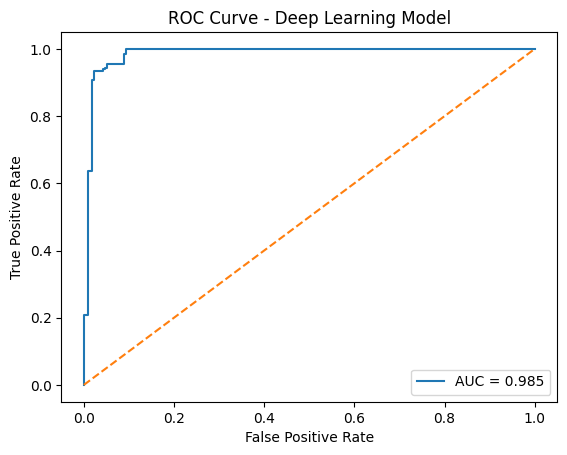

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deep Learning Model")
plt.legend()
plt.show()

In [26]:
!pip install shap

**Prepare Background Data**

In [27]:
import shap
X_background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]


# **Create SHAP Explainer for Deep Learning Model**

For TensorFlow / Keras models, bold text

In [28]:
explainer = shap.Explainer(model, X_background)

# **Compute SHAP Values**

In [29]:
shap_values = explainer(X_test_scaled)

PermutationExplainer explainer: 411it [04:22,  1.56it/s]


# **Feature Names**

In [30]:
feature_names = X.columns.tolist()

# **Global Feature Importance (Summary Plot)**
Interpretation:

Top features = most influential ECG parameters

Red = high feature value

Blue = low feature value

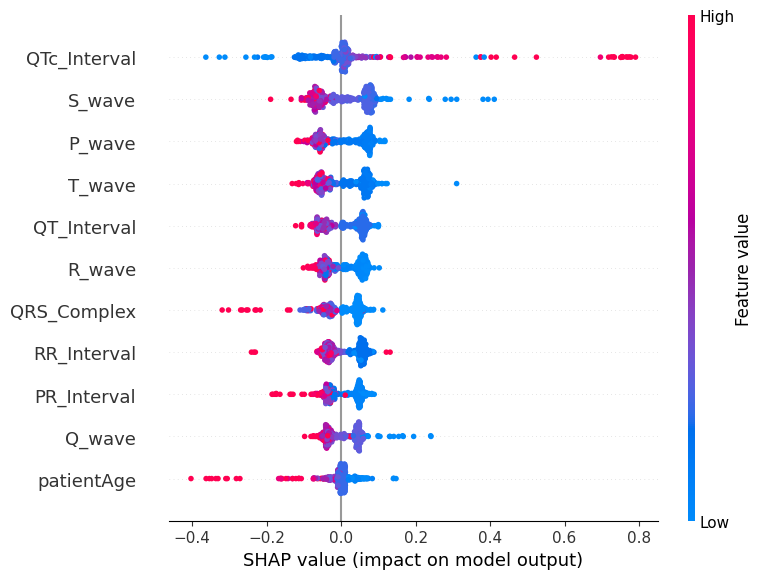

In [31]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names
)

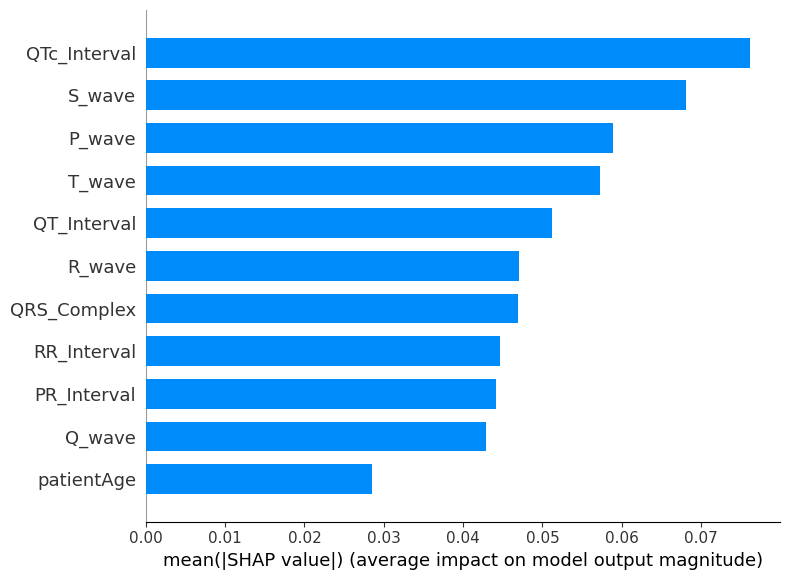

In [32]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names,
    plot_type="bar"
)

# **Bar Plot (Mean Absolute Importance)**

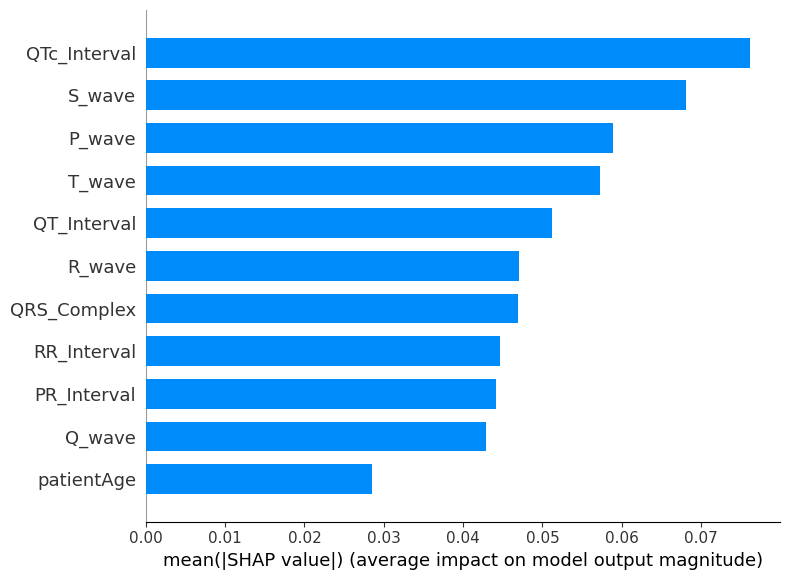

In [33]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names,
    plot_type="bar"
)

# **Feature Impact Direction (Dependence Plot)**

See how one ECG feature affects risk prediction:

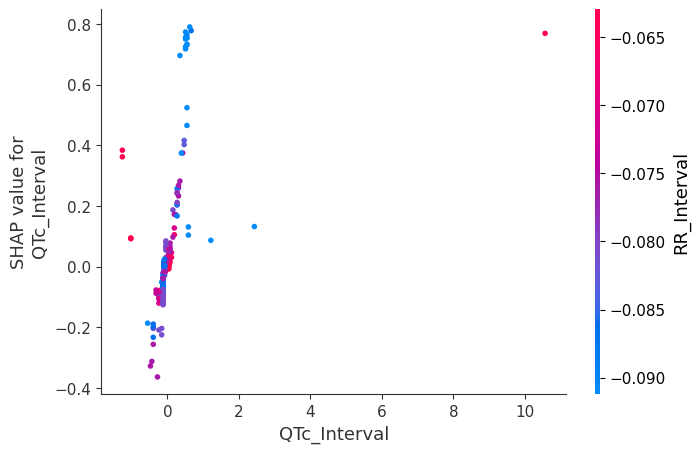

In [34]:
shap.dependence_plot(
    "QTc_Interval",      # replace with actual column name
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names
)